### Stock Price Prediction 

**Introduction**

Investment in Stock market has utter importance in financial world, and plays a crucial role in modern economy. To faciliate proper invesments, it is extremely important to have an idea of changes in stock market prices, and hence, a machine learning model predicting market prices will be beneficial. Here I have used historical stock price data of Google Inc. to build a machine learning model that predicts stock prices efficiently.


In [69]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
from datetime import datetime

import yfinance as yf

# Import packages for data visualization
from matplotlib import rc
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from xgboost import plot_importance

In [3]:
start_date = datetime(2005, 1, 1) 
end_date = datetime(2025, 1, 1) 
  
# get the data 
data = yf.download('GOOGL', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2005-01-03,5.054500,5.077689,4.873723,4.922097,633134232
2005-01-04,4.849786,5.059986,4.824354,5.021836,549685764
2005-01-05,4.825102,4.909629,4.793186,4.823605,329134536
2005-01-06,4.701425,4.884694,4.680730,4.864249,415068516
2005-01-07,4.833579,4.843553,4.707160,4.753539,386129484


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   5033 non-null   float64
 1   (High, GOOGL)    5033 non-null   float64
 2   (Low, GOOGL)     5033 non-null   float64
 3   (Open, GOOGL)    5033 non-null   float64
 4   (Volume, GOOGL)  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [6]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,48.565649,49.060480,48.050975,48.551326,1.109902e+08
std,46.010354,46.494263,45.512601,45.984967,1.403500e+08
min,4.363312,4.448339,4.302971,4.371042,9.312000e+06
25%,13.351250,13.501108,13.228073,13.389900,3.040440e+07
50%,28.433426,28.694029,28.187319,28.497693,5.487200e+07
75%,64.449867,64.727365,63.621862,64.271513,1.322396e+08
max,196.660004,201.419998,194.979996,197.250000,1.643023e+09


In [7]:
data.isna().sum()

Price   Ticker
Close   GOOGL     0
High    GOOGL     0
Low     GOOGL     0
Open    GOOGL     0
Volume  GOOGL     0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.columns

MultiIndex([( 'Close', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            (  'Open', 'GOOGL'),
            ('Volume', 'GOOGL')],
           names=['Price', 'Ticker'])

In [10]:
data['Date'] = data.index

In [11]:
data.head()

Price,Close,High,Low,Open,Volume,Date
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,
Date,,,,,,
2005-01-03,5.054500,5.077689,4.873723,4.922097,633134232,2005-01-03
2005-01-04,4.849786,5.059986,4.824354,5.021836,549685764,2005-01-04
2005-01-05,4.825102,4.909629,4.793186,4.823605,329134536,2005-01-05
2005-01-06,4.701425,4.884694,4.680730,4.864249,415068516,2005-01-06
2005-01-07,4.833579,4.843553,4.707160,4.753539,386129484,2005-01-07


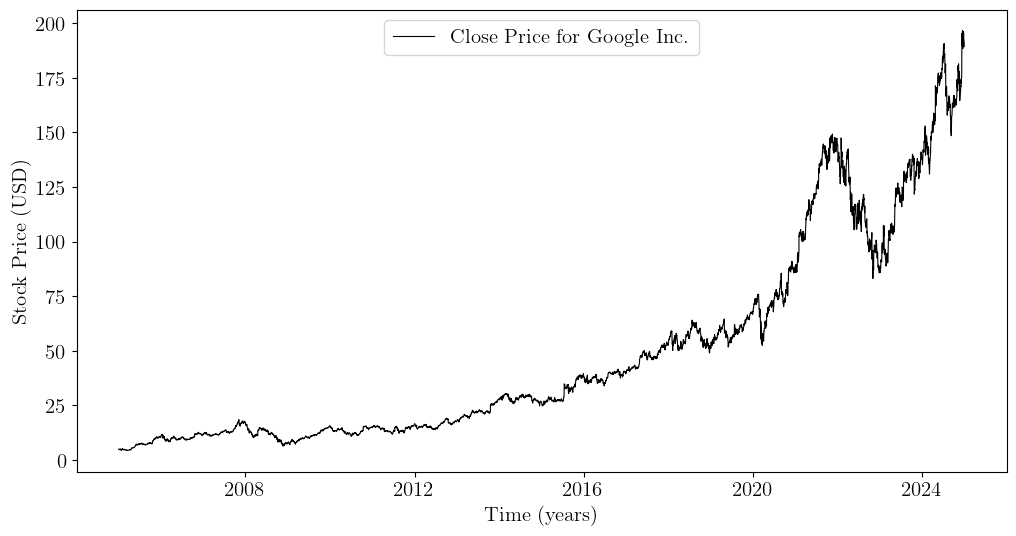

In [12]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.figure(figsize = (12, 6))
plt.plot(data['Date'], data['Close'], 'k', lw = 0.8, label = 'Close Price for Google Inc.')
plt.xlabel('Time (years)', fontsize = 15)
plt.ylabel('Stock Price (USD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper center', fontsize = 15)
plt.show()

In [13]:
data['delta HL'] = data['High'] - data['Low']
data['delta HL MA50'] = data['delta HL'].rolling(50).mean()


In [14]:
data['delta OC'] = data['Open'] - data['Close']
data['delta OC MA50'] = data['delta OC'].rolling(50).mean()
data['delta price'] = data['Open'] - data['Close'].shift(1)

In [15]:
data['delta price'] = data['delta price'].fillna(0)

In [16]:
data.head()

Price,Close,High,Low,Open,Volume,Date,delta HL,delta HL MA50,delta OC,delta OC MA50,delta price
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,,,,,,
Date,,,,,,,,,,,
2005-01-03,5.054500,5.077689,4.873723,4.922097,633134232,2005-01-03,0.203966,NaN,-0.132403,NaN,0.000000
2005-01-04,4.849786,5.059986,4.824354,5.021836,549685764,2005-01-04,0.235632,NaN,0.172050,NaN,-0.032664
2005-01-05,4.825102,4.909629,4.793186,4.823605,329134536,2005-01-05,0.116444,NaN,-0.001497,NaN,-0.026181
2005-01-06,4.701425,4.884694,4.680730,4.864249,415068516,2005-01-06,0.203964,NaN,0.162824,NaN,0.039147
2005-01-07,4.833579,4.843553,4.707160,4.753539,386129484,2005-01-07,0.136393,NaN,-0.080040,NaN,0.052114


In [17]:
data.isna().sum()

Price          Ticker
Close          GOOGL      0
High           GOOGL      0
Low            GOOGL      0
Open           GOOGL      0
Volume         GOOGL      0
Date                      0
delta HL                  0
delta HL MA50            49
delta OC                  0
delta OC MA50            49
delta price               0
dtype: int64

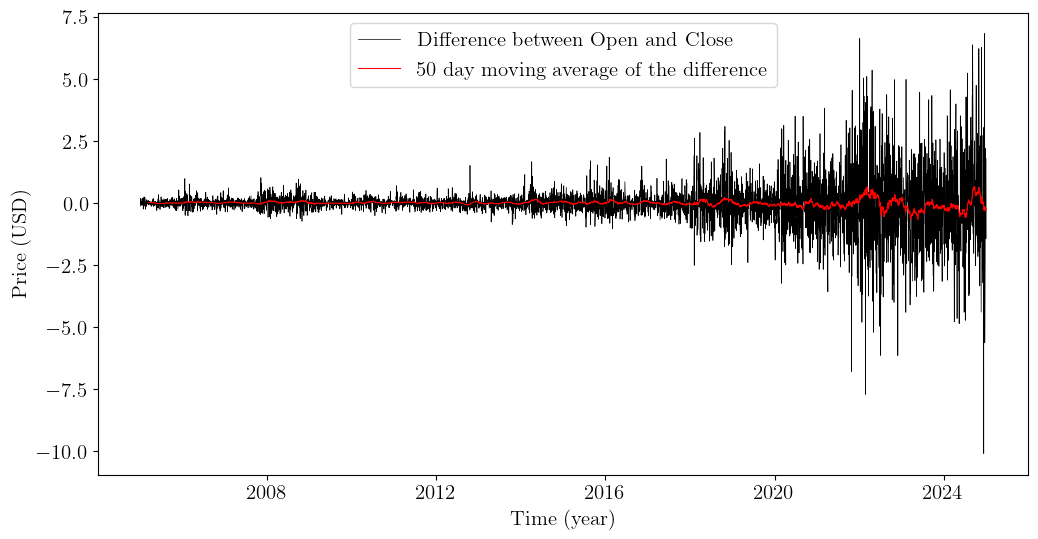

In [18]:
plt.figure(figsize = (12, 6))
plt.plot(data['Date'], data['delta OC'], 'k', lw = 0.5, label = 'Difference between Open and Close')
plt.plot(data['Date'], data['delta OC MA50'], 'r', lw = 0.8, label = '50 day moving average of the difference')
plt.xlabel('Time (year)', fontsize = 15)
plt.ylabel('Price (USD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper center', fontsize = 15)
plt.show()

In [19]:
data.isna().sum()

Price          Ticker
Close          GOOGL      0
High           GOOGL      0
Low            GOOGL      0
Open           GOOGL      0
Volume         GOOGL      0
Date                      0
delta HL                  0
delta HL MA50            49
delta OC                  0
delta OC MA50            49
delta price               0
dtype: int64

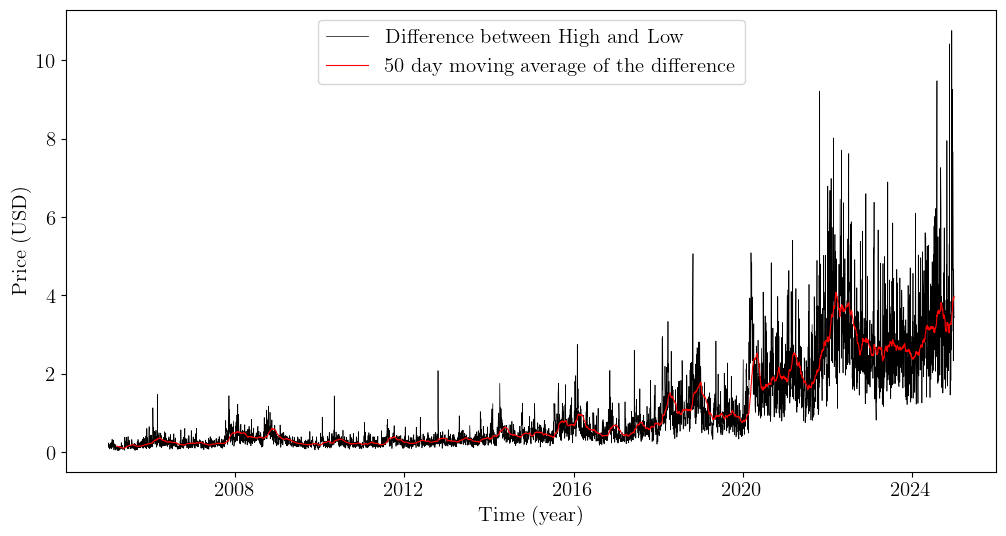

In [20]:
plt.figure(figsize = (12, 6))
plt.plot(data['Date'], data['delta HL'], 'k', lw = 0.5, label = 'Difference between High and Low')
plt.plot(data['Date'], data['delta HL MA50'], 'r', lw = 0.8, label = '50 day moving average of the difference')
plt.xlabel('Time (year)', fontsize = 15)
plt.ylabel('Price (USD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper center', fontsize = 15)
plt.show()

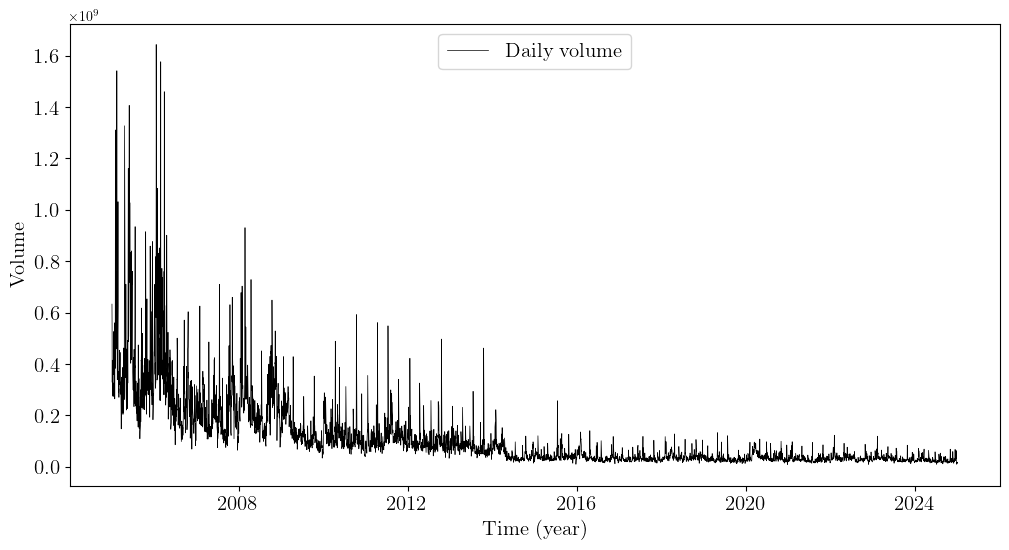

In [21]:
plt.figure(figsize = (12, 6))
plt.plot(data['Date'], data['Volume'], 'k', lw = 0.5, label = 'Daily volume')
plt.xlabel('Time (year)', fontsize = 15)
plt.ylabel('Volume', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper center', fontsize = 15)
plt.show() 

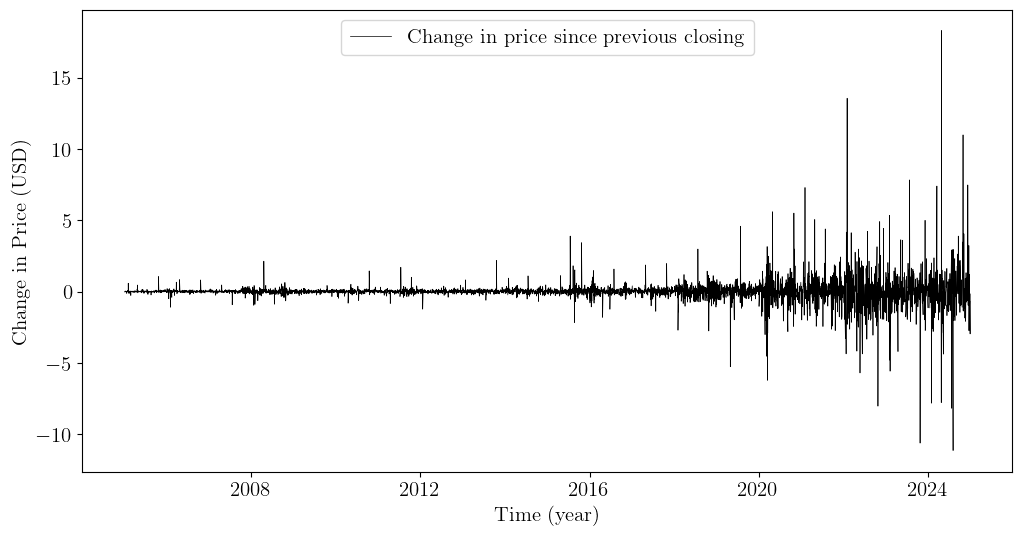

In [142]:
plt.figure(figsize = (12, 6))
plt.plot(data['Date'], data['delta price'], 'k', lw = 0.5, label = 'Change in price since previous closing')
plt.xlabel('Time (year)', fontsize = 15)
plt.ylabel('Change in Price (USD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper center', fontsize = 15)
plt.show()  

In [23]:
X = data.copy()
X = X.drop(['delta HL MA50', 'delta OC MA50', 'Date'], axis = 1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-01-03 to 2024-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   5033 non-null   float64
 1   (High, GOOGL)    5033 non-null   float64
 2   (Low, GOOGL)     5033 non-null   float64
 3   (Open, GOOGL)    5033 non-null   float64
 4   (Volume, GOOGL)  5033 non-null   int64  
 5   (delta HL, )     5033 non-null   float64
 6   (delta OC, )     5033 non-null   float64
 7   (delta price, )  5033 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 353.9 KB


In [25]:
X.head()

Price,Close,High,Low,Open,Volume,delta HL,delta OC,delta price
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,,,
Date,,,,,,,,
2005-01-03,5.054500,5.077689,4.873723,4.922097,633134232,0.203966,-0.132403,0.000000
2005-01-04,4.849786,5.059986,4.824354,5.021836,549685764,0.235632,0.172050,-0.032664
2005-01-05,4.825102,4.909629,4.793186,4.823605,329134536,0.116444,-0.001497,-0.026181
2005-01-06,4.701425,4.884694,4.680730,4.864249,415068516,0.203964,0.162824,0.039147
2005-01-07,4.833579,4.843553,4.707160,4.753539,386129484,0.136393,-0.080040,0.052114


In [26]:
Y = X['Close']
X = X.drop(['Close'], axis = 1)

In [27]:
X.head()

Price,High,Low,Open,Volume,delta HL,delta OC,delta price
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,,,
Date,,,,,,,
2005-01-03,5.077689,4.873723,4.922097,633134232,0.203966,-0.132403,0.000000
2005-01-04,5.059986,4.824354,5.021836,549685764,0.235632,0.172050,-0.032664
2005-01-05,4.909629,4.793186,4.823605,329134536,0.116444,-0.001497,-0.026181
2005-01-06,4.884694,4.680730,4.864249,415068516,0.203964,0.162824,0.039147
2005-01-07,4.843553,4.707160,4.753539,386129484,0.136393,-0.080040,0.052114


In [102]:
X_tr, X_test, Y_tr, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**Model Building and Evaluation**

The strategy I am going to follow is:
1. Build ML model using XGboost algorithm. 
2. Perform cross-validation and hyperparameters tuning, and train them on the training data. 
3. Select the tuned model and deploy it on the test data.
4. Compare our prediction with the observed data. 
5. Evaluate performance metrics.

I am going to build a Tree-based XGBoost model, and cross-validate them over 5 folds of training data. For our needs, we have to prioritize accurate prediction of stock prices. This is why I am choosing MSE as my performance metric.

In [54]:
# Instantiate the XGBoost classifier
xgb = XGBRegressor(objective = 'reg:squarederror', random_state = 0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4, 8, 12],
             'min_child_weight': [1, 3, 5],
             'learning_rate': [0.01, 0.1, 0.3],
             'n_estimators': [50, 100, 200]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['neg_mean_squared_error']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5, refit = 'neg_mean_squared_error')

In [55]:
xgb_cv.fit(X_tr, Y_tr)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [4, 8, 12], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             refit='neg_mean_squared_error',
             scoring=['neg_mean_squared_error'])

In [103]:
print(xgb_cv.best_params_)
print(xgb_cv.best_score_)

best_params = xgb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100}
-0.28443807282919753


In [104]:
best_model = XGBRegressor(**best_params, objective='reg:squarederror', seed=42)
best_model.fit(X_tr, Y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [105]:
Y_pred = best_model.predict(X_test)

In [106]:
print(mean_squared_error(Y_test, Y_pred))

0.18991638978459374


In [107]:
Y_test

Ticker,GOOGL
Date,
2017-10-12,50.100880
2014-03-06,30.410530
2012-03-01,15.519318
2024-04-30,162.192047
2024-05-14,169.724731
...,...
2020-12-11,88.419472
2018-01-25,58.893505
2023-08-31,135.678146


In [135]:
Y_test['pred'] = Y_pred
Y_test.head()


Ticker,GOOGL,pred
Date,,
2017-10-12,50.100880,49.967052
2014-03-06,30.410530,30.397598
2012-03-01,15.519318,15.549909
2024-04-30,162.192047,163.829361
2024-05-14,169.724731,170.423645


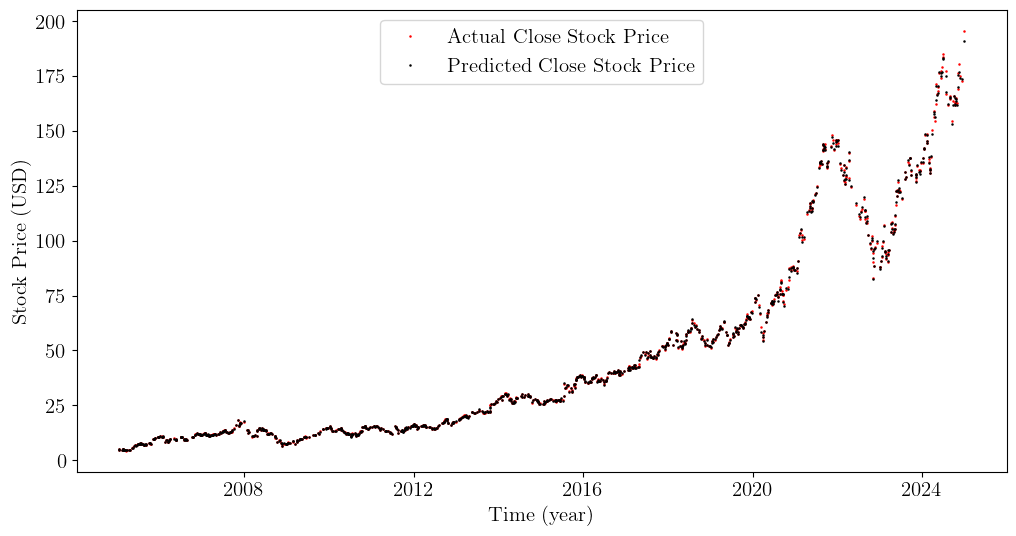

In [155]:
plt.figure(figsize = (12, 6))
plt.plot(Y_test['GOOGL'], 'ro', markersize = .8, label = 'Actual Close Stock Price')
plt.plot(Y_test['pred'], 'ko', markersize = .8, label = 'Predicted Close Stock Price')
plt.xlabel('Time (year)', fontsize = 15)
plt.ylabel('Stock Price (USD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc = 'upper center', fontsize = 15)
plt.show()

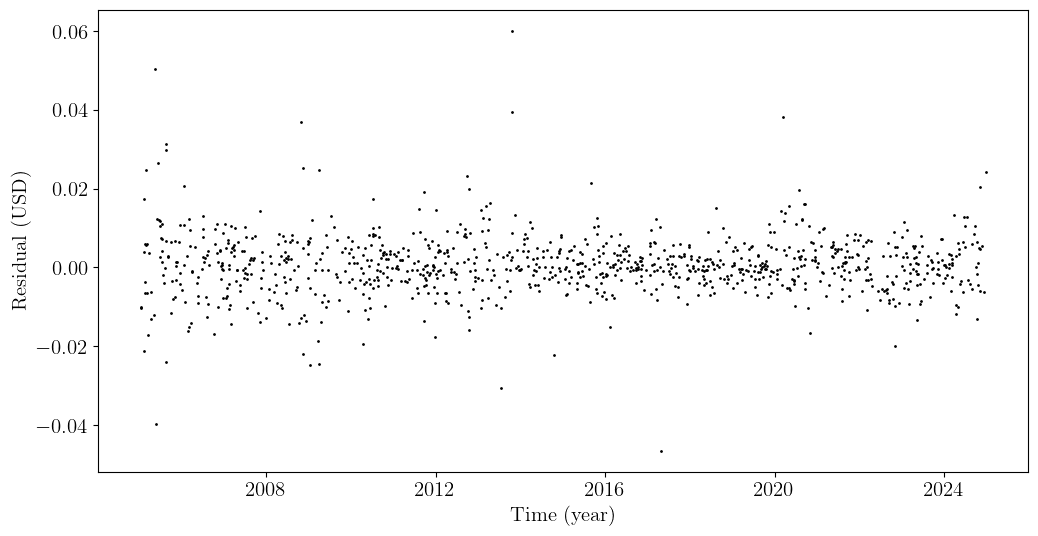

In [152]:
plt.figure(figsize = (12, 6))
plt.plot((Y_test['GOOGL'] - Y_test['pred'])/Y_test['GOOGL'], 'ko', markersize = 1)
plt.xlabel('Time (year)', fontsize = 15)
plt.ylabel('Residual (USD)', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

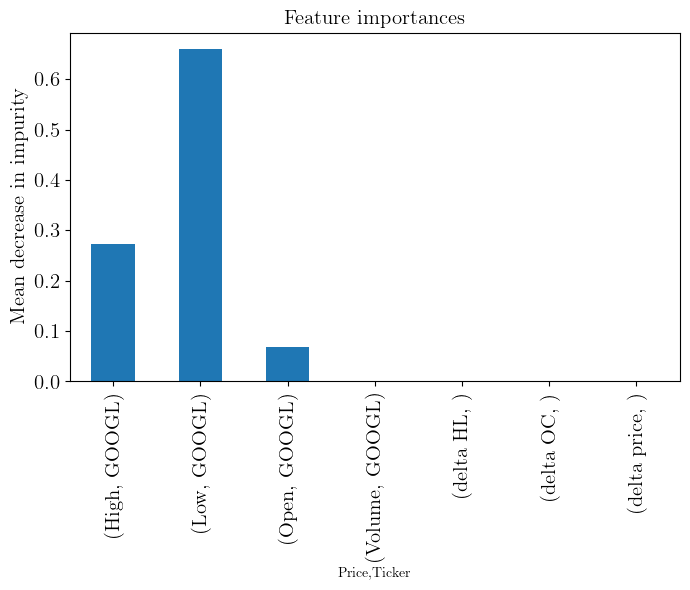

In [153]:
importances = xgb_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index = X_test.columns)

fig, ax = plt.subplots(figsize = (7, 6))
rf_importances.plot.bar(ax = ax)
ax.set_title('Feature importances', fontsize = 15)
ax.set_ylabel('Mean decrease in impurity', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
fig.tight_layout()

We obtain MSE $\sim 0.19$ while comparing our predictions with test data. Our optimized model performed $29.6\%$ better than the initial model. Feature importance plot shows that the daily lowest stock price of Google is the most imporant feature while predicting stock prices.